In [56]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv("Seed_Data.csv")

data_to_normalize = data.iloc[:, :7]
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(data_to_normalize)
normalized_df = pd.DataFrame(normalized_data, columns=['A', 'P', 'C', 'LK', 'WK', 'A_Coef', 'LKG'])
normalized_df

,A,P,C,LK,WK,A_Coef,LKG
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994
...,...,...,...,...,...,...,...
205,0.151086,0.163223,0.637024,0.134009,0.250178,0.372635,0.172821
206,0.060434,0.097107,0.390200,0.135698,0.117605,0.462872,0.238306
207,0.246459,0.258264,0.727768,0.189752,0.429081,0.981667,0.264402
208,0.118036,0.165289,0.399274,0.155405,0.146828,0.368344,0.258493


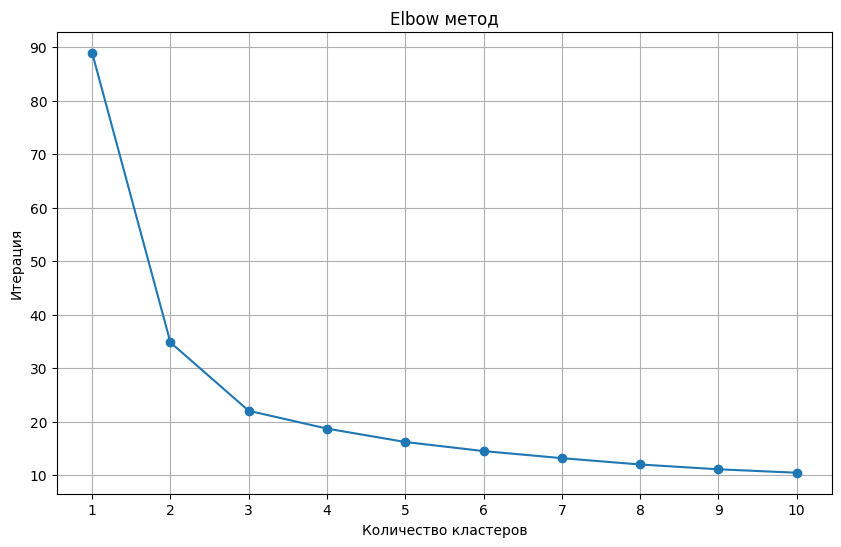

In [38]:
data_to_normalize = data.iloc[:, :7]
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_to_normalize)
normalized_df = pd.DataFrame(normalized_data, columns=['A', 'P', 'C', 'LK', 'WK', 'A_Coef', 'LKG'])

inertias = []
cluster_range = range(1, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(normalized_df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertias, marker='o')
plt.title('Elbow метод')
plt.xlabel('Количество кластеров')
plt.ylabel('Итерация')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [51]:
kmeans = KMeans(n_clusters=3, n_init=10)
data['c'] = kmeans.fit_predict(normalized_data)
data['c2'] = kmeans.fit_predict(data.iloc[:, :7])

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 2,
                       ):
    print(data)

         A      P     C    LK    WK  A_Coef   LKG  target  c  c2
0    15.26  14.84  0.87  5.76  3.31    2.22  5.22       0  0   0
1    14.88  14.57  0.88  5.55  3.33    1.02  4.96       0  0   0
2    14.29  14.09  0.91  5.29  3.34    2.70  4.83       0  0   0
3    13.84  13.94  0.90  5.32  3.38    2.26  4.80       0  0   0
4    16.14  14.99  0.90  5.66  3.56    1.35  5.17       0  0   0
5    14.38  14.21  0.90  5.39  3.31    2.46  4.96       0  0   0
6    14.69  14.49  0.88  5.56  3.26    3.59  5.22       0  0   0
7    14.11  14.10  0.89  5.42  3.30    2.70  5.00       0  0   0
8    16.63  15.46  0.87  6.05  3.46    2.04  5.88       0  1   0
9    16.44  15.25  0.89  5.88  3.50    1.97  5.53       0  0   0
10   15.26  14.85  0.87  5.71  3.24    4.54  5.31       0  0   0
11   14.03  14.16  0.88  5.44  3.20    1.72  5.00       0  0   0
12   13.89  14.02  0.89  5.44  3.20    3.99  4.74       0  0   0
13   13.78  14.06  0.88  5.48  3.16    3.14  4.87       0  0   0
14   13.74  14.05  0.87  

In [ ]:
Выводы:

Количество кластеров = 3 исходя из метода расчёта сумм расстояний.
Тип кластеров: скученные.